In [5]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import os
import sys

import warnings
import argparse
import numpy as np
import yaml
import cv2
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
img_dir = "/data/colposcopy/colposcopy_1"
img_dir_fosun = "/data/colposcopy/colposcopy"
type_1_train = glob(os.path.join(img_dir,"train*","Type_1","*.jpg"))
type_2_train = glob(os.path.join(img_dir,"train*","Type_2","*.jpg"))
type_3_train = glob(os.path.join(img_dir,"train*","Type_3","*.jpg"))

img_test   = glob(os.path.join(img_dir,"test","*.jpg"))
img_test_wo_answer = glob(os.path.join(img_dir,"test_stg2","*.jpg"))
f = open(os.path.join(img_dir,"solution_stg1_release.csv"))
type_dict = {}

cont = f.readlines()
for i in range(1, len(cont)):
    line = cont[i].rstrip('\n')
    ctype = line.split(',').index('1')
#   print(i,ctype)
    type_dict[i] = ctype
f.close()

print("training num:",len(type_1_train),len(type_2_train),len(type_3_train))
print("test num (with answer):",len(img_test))

training num: 1470 4241 2424
test num (with answer): 512


In [6]:
img_fosun_dir = os.path.join(img_dir_fosun,"extra","yindaojing")
extra_pic = glob(os.path.join(img_fosun_dir,"*","caporg*.jpg"))

patient_dict = {}
def process_dir(cur_dir):
    cur_patient = cur_dir.split('/')[-2]
    cur_img = cur_dir.split('/')[-1]
    if cur_patient in patient_dict:
        patient_dict[cur_patient].append(cur_img) 
    else:
        patient_dict[cur_patient] = []
    return cur_patient+'::'+cur_img

extra_valid = list(map(lambda x:process_dir(x),extra_pic))
print (len(patient_dict))
susm = 0
for ii in patient_dict:
    susm += len(patient_dict[ii])
print(susm)

363
2229


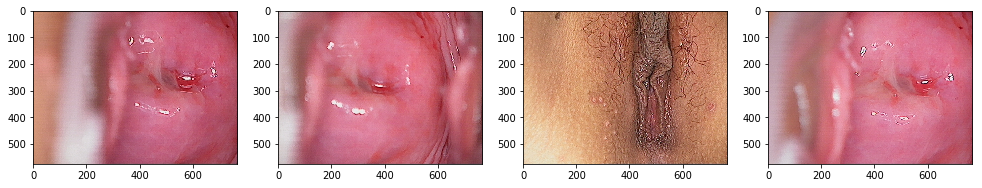

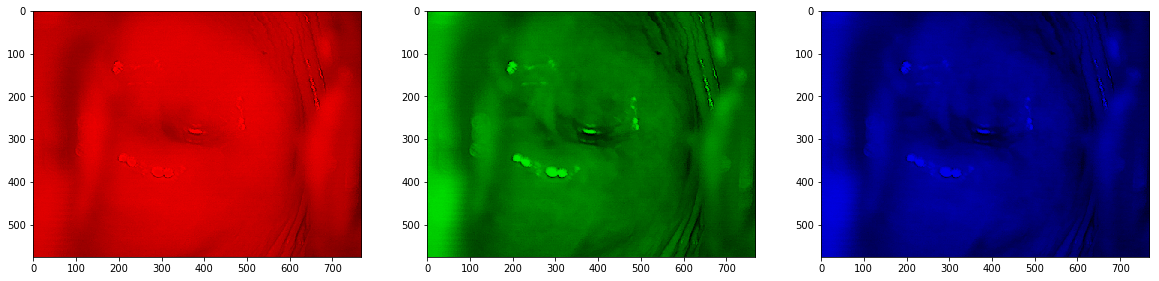

In [7]:
def cvt(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
def get_img_from_path(num_pat,num_pic):
    return cv2.imread(os.path.join(img_fosun_dir,str(num_pat),patient_dict[str(num_pat)][num_pic]))
def plot_img_from_path(num_pat,num_pic):
    plt.imshow(cvt(cv2.imread(os.path.join(img_fosun_dir,str(num_pat),patient_dict[str(num_pat)][num_pic]))))
def plot_imgs_from_path(num_pat):
    fig = plt.figure(figsize=(30,30))
    num_pic = len(patient_dict[str(num_pat)])
    if num_pic<3:
        for i in range(0,num_pic): 
            plt.subplot(100+10*num_pic+i+1)
            plt.imshow(cvt(cv2.imread(os.path.join(img_fosun_dir,str(num_pat),patient_dict[str(num_pat)][i]))))  
    else:
        for i in range(0,4): 
            plt.subplot(100+10*num_pic+i+1)
            plt.imshow(cvt(cv2.imread(os.path.join(img_fosun_dir,str(num_pat),patient_dict[str(num_pat)][i]))))
            
def plot_with_color(img,channel):
    size = img.shape
    zeros = np.zeros(size,dtype="uint8")
    if channel == 'r' or channel == 0:
        return cv2.merge([zeros,zeros,img])
    elif channel == 'g' or channel == 1:
        return cv2.merge([zeros,img,zeros])
    else:
        return cv2.merge([img,zeros,zeros])
    
def channel_split(image,opencv=True):
    if opencv == True:
        b_channel = image[:,:,0]
        g_channel = image[:,:,1]
        
        r_channel = image[:,:,2]
    else:
        r_channel = image[:,:,0]
        g_channel = image[:,:,1]
        b_channel = image[:,:,2]
    return r_channel,g_channel,b_channel

pat = 60
plot_imgs_from_path(pat)
img_1 = get_img_from_path(pat,1)
img_2 = get_img_from_path(pat,2)
img_3 = get_img_from_path(pat,3)
r_channel,g_channel,b_channel = channel_split(img_1)


plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(cvt(plot_with_color(r_channel,0)))
plt.subplot(132)
plt.imshow(cvt(plot_with_color(g_channel,1)))
plt.subplot(133)
plt.imshow(cvt(plot_with_color(b_channel,2)))

# Demo for remove spetral reflection

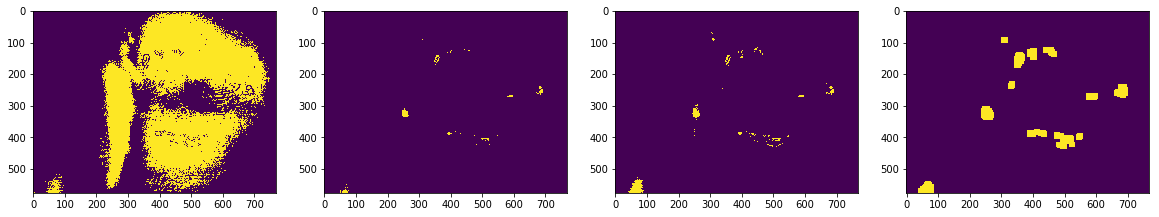

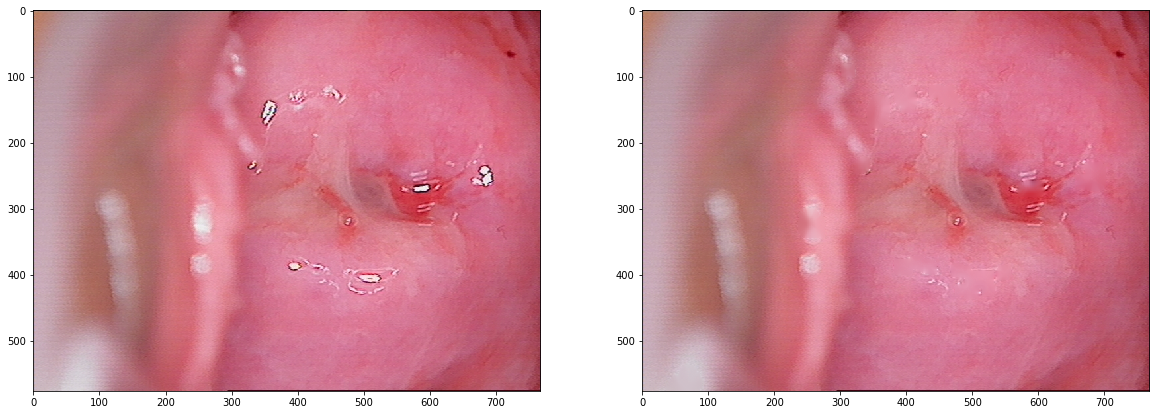

In [8]:

img = img_3
r_c = img[:,:,2]
g_c = img[:,:,1]
b_c = img[:,:,0]

plt.figure(figsize=(20,20))

_,r_thres = cv2.threshold(r_c, 210, 255, cv2.THRESH_BINARY)
_,g_thres = cv2.threshold(g_c, 208, 255, cv2.THRESH_BINARY)
_,b_thres = cv2.threshold(b_c, 206, 255, cv2.THRESH_BINARY)

plt.subplot(141)
plt.imshow(r_thres)
plt.subplot(142)
plt.imshow(g_thres)
plt.subplot(143)
plt.imshow(b_thres)
plt.subplot(144)

mixed = r_thres & b_thres & g_thres
kernel_dilate = np.ones((18, 18), np.uint8)
mask = cv2.dilate(mixed,kernel_dilate)
plt.imshow(mask)

dst = cv2.inpaint(img,mask,14,cv2.INPAINT_TELEA)
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(cvt(img_3))
plt.subplot(122)
plt.imshow(cvt(dst))

(4128, 3096, 3) (4128, 3096, 3) (3264, 2448, 3)


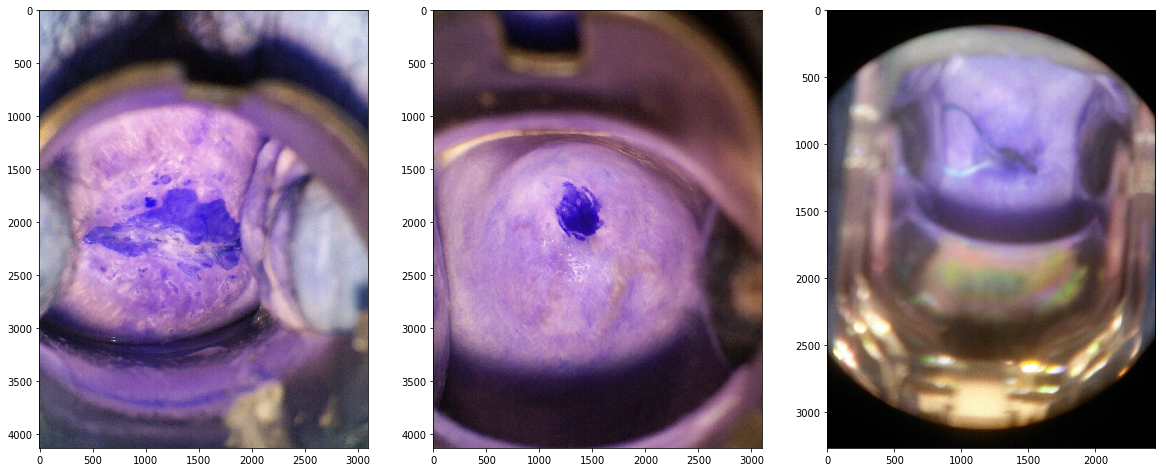

In [16]:


i1 = type_1_train[9]
i1 = cv2.imread(i1)
i2 = type_1_train[24]
i2 = cv2.imread(i2)
i3 = type_1_train[29]
i3 = cv2.imread(i3)

plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(cvt(i1))
plt.subplot(132)
plt.imshow(cvt(i2))
plt.subplot(133)
plt.imshow(cvt(i3))

print(i1.shape,i2.shape,i3.shape)

In [ ]:
import csv
import os
import cv2

with open(os.path.join(img_dir_fosun,"Type_1_bbox.tsv")) as f:
    f_csv = csv.reader(f)
    index = 0
    for row in  f_csv:
        if index>3:
            break
        if index==0:
            index += 1
            continue
        index += 1
        row = row[0].split()
        token_slash = row[0].split("\\")
        type_c= token_slash[0]
        
        img_name = token_slash[-1]
        img_index = int(img_name.split('.')[0])
        
        boxes = list()
        num_box = row[1]
        for i in range(int(num_box)):
            boxes.append(row[2+i*4:2+i*4+4])
       
        i1 = type_1_train[img_index]
        i1 = cvt(cv2.imread(i1))
        for box in boxes:
            box = map(lambda x: int(x),box)
            cv2.rectangle(i1,(box[0],box[1]),(box[2],box[3]),(0,255,0),3)
        plt.figure(figsize=(10,10))
        plt.imshow(i1)
        

In [25]:
def get_filename(image_id, image_type):
    """
    Method to get image file path from its id and type   
    """
    if image_type == "Type_1" or \
        image_type == "Type_2" or \
        image_type == "Type_3":
        data_path = os.path.join(TRAIN_DATA, image_type)
    elif image_type == "Test":
        data_path = TEST_DATA
    elif image_type == "AType_1" or \
          image_type == "AType_2" or \
          image_type == "AType_3":
        data_path = os.path.join(ADDITIONAL_DATA, image_type)
    else:
        raise Exception("Image type '%s' is not recognized" % image_type)

    ext = 'jpg'
    return os.path.join(data_path, "{}.{}".format(image_id, ext))

def get_image_data(image_id, image_type):
    """
    Method to get image data as np.array specifying image id and type
    """
    fname = get_filename(image_id, image_type)
    img = cv2.imread(fname)
    assert img is not None, "Failed to read image : %s, %s" % (image_id, image_type)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
from torch import optim
from torch import Tensor
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset,Sampler
from torchvision import datasets,transforms
from torch.nn import functional as F
from torch.nn import init

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

from PIL import Image
import PIL
import math
import os
import sys
import warnings
import argparse
import numpy as np
import yaml
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
from tqdm import tqdm

sys.path.append("/home/shiyi/gpu/gpu/")
sys.path.append("/home/shiyi/colposcopy/colposcopy/util")
img_dir_1 = "/data/colposcopy/colposcopy_1"
img_dir = "/data/colposcopy/colposcopy"

from gpu_allocation import set_gpu
corrupt_set  = set()
types = [1,2,3]
error = glob(os.path.join(img_dir,"train*","*","2845.jpg"))+ \
    glob(os.path.join(img_dir,"train*","*","5893.jpg"))+glob(os.path.join(img_dir,"train*","*","5892.jpg"))
print(error)

type_1_train = [i for i in glob(os.path.join(img_dir_1,"train*","Type_1","*.jpg")) if i not in error]
type_2_train = [i for i in glob(os.path.join(img_dir_1,"train*","Type_2","*.jpg")) if i not in error][:1500]
type_3_train = [i for i in glob(os.path.join(img_dir_1,"train*","Type_3","*.jpg")) if i not in error][:1500]

type_data_train = [type_1_train,type_2_train,type_3_train]

img_test   = glob(os.path.join(img_dir_1,"test","*.jpg"))
img_test_wo_answer = glob(os.path.join(img_dir_1,"test_stg2","*.jpg"))
test_path = os.path.join(img_dir,"solution_stg1_release.csv")

def get_dict(file_path,imgs):
    cur_dict = {}
    f = open(file_path)
    cont = f.readlines()[1:]
    for i in range(len(cont)):
        line = cont[i].rstrip('\n')
        cur_dict[i] = line.split(',').index('1')
    f.close()
    return cur_dict 

def collate_fn1(batch):
    x = [item[0] for item in batch if item[0] is not None]
    y = [item[1] for item in batch if item[0] is not None]
    return x,y

def cvt(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

class ColpoTestDataset(Dataset):
    
    def __init__(self,transform=None):
        self.transform = transform
        self.type_dict = get_dict(test_path,img_test)
    def __getitem__(self, index):
        file_name = img_test[index]
        x = Image.open(file_name)
        if x is None:
            return  None,None
        if self.transform is not None:
            x = self.transform(x)
        y =self.type_dict[index]-1
        #y [self.type_dict[index]-1] = 1
        return x,y
    def __len__(self):
        return len(self.type_dict)
    
class ColpoTrainDataset(Dataset):
    def __init__(self,transform=None):
        self.transform = transform
        self.Xy = []
        for type_index in types:
            for img_index in type_data_train[type_index-1]:
                self.Xy.append((img_index,type_index))
        self.x_data, self.y_data = zip(*self.Xy)
        self.x_data = list(self.x_data)
        self.y_data = list(self.y_data)
    def __getitem__(self, index):
        file_name = self.x_data[index]
        x = Image.open(file_name)
        if x is None:
            return None,None
        if self.transform is not None:
            x = self.transform(x)
        #y = [0,0,0]
        #y[self.y_data[index]-1] = 1
        y = self.y_data[index]-1
        return x,y
    def __len__(self):
        return len(self.x_data)

def plot_confusion_matrix(y_true, y_pred, 
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                             plot=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    if not plot:
        return
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv2d') != -1:
        init.xavier_normal_(m.weight.data)
        init.constant_(m.bias.data, 0.0)
    elif classname.find('Linear') != -1:
        init.xavier_normal_(m.weight.data)
        init.constant_(m.bias.data, 0.0)

[u'/data/colposcopy/colposcopy/train_stg2/Type_2/2845.jpg', u'/data/colposcopy/colposcopy/train_stg2/Type_1/5893.jpg', u'/data/colposcopy/colposcopy/train_stg2/Type_2/5892.jpg']


In [2]:
class ResidualBlock(nn.Module):
    def __init__(self,inchannel,outchannel,stride=1,shortcut=None):
        super(ResidualBlock, self).__init__()
        self.left = nn.Sequential(
            nn.Conv2d(inchannel, outchannel, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(outchannel),
            nn.ReLU(inplace=True),
            nn.Conv2d(outchannel, outchannel, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(outchannel)
        )
        self.shortcut = nn.Sequential()
        if stride != 1 or inchannel != outchannel:
            self.shortcut = nn.Sequential(
                nn.Conv2d(inchannel, outchannel, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(outchannel)
            )

    def forward(self, x):
        out = self.left(x)
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self,num_classes=3):
        super(ResNet,self).__init__()
        self.pre=nn.Sequential(
            nn.Conv2d(3,64,7,2,3,bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3,2,1)
        )
        
        self.layer1=self._make_layer(64,64,3)
        self.layer2=self._make_layer(64,128,4,stride=2)
        self.layer3=self._make_layer(128,256,6,stride=2)
        self.layer4=self._make_layer(256,512,3,stride=2)
        self.fc=nn.Linear(512, num_classes)
        
    def _make_layer(self,inchannel,outchannel,block_num,stride=1):
        shortcut=nn.Sequential(
            nn.Conv2d(inchannel,outchannel,1,stride,bias=False),
            nn.BatchNorm2d(outchannel))
 
        layers=[ ]
        layers.append(ResidualBlock(inchannel,outchannel,stride,shortcut))
        
        for i in range(1,block_num):
            layers.append(ResidualBlock(outchannel,outchannel))
        return nn.Sequential(*layers)
    
    def forward(self,x):
        x=self.pre(x)
        x=self.layer1(x)
        x=self.layer2(x)
        x=self.layer3(x)
        x=self.layer4(x)
        x=F.avg_pool2d(x,7)
        x=x.view(x.size(0),-1)
        return self.fc(x)

In [3]:
class Bottleneck(nn.Module):
    def __init__(self, nChannels, growthRate):
        super(Bottleneck, self).__init__()
        interChannels = 4*growthRate
        self.bn1 = nn.BatchNorm2d(nChannels)
        self.conv1 = nn.Conv2d(nChannels, interChannels, kernel_size=1,
                               bias=False)
        self.bn2 = nn.BatchNorm2d(interChannels)
        self.conv2 = nn.Conv2d(interChannels, growthRate, kernel_size=3,
                               padding=1, bias=False)

    def forward(self, x):
        out = self.conv1(F.relu(self.bn1(x)))
        out = self.conv2(F.relu(self.bn2(out)))
        out = torch.cat((x, out), 1)
        return out

class SingleLayer(nn.Module):
    def __init__(self, nChannels, growthRate):
        super(SingleLayer, self).__init__()
        self.bn1 = nn.BatchNorm2d(nChannels)
        self.conv1 = nn.Conv2d(nChannels, growthRate, kernel_size=3,
                               padding=1, bias=False)

    def forward(self, x):
        out = self.conv1(F.relu(self.bn1(x)))
        out = torch.cat((x, out), 1)
        return out

class Transition(nn.Module):
    def __init__(self, nChannels, nOutChannels):
        super(Transition, self).__init__()
        self.bn1 = nn.BatchNorm2d(nChannels)
        self.conv1 = nn.Conv2d(nChannels, nOutChannels, kernel_size=1,
                               bias=False)

    def forward(self, x):
        out = self.conv1(F.relu(self.bn1(x)))
        out = F.avg_pool2d(out, 2)
        return out


class DenseNet(nn.Module):
    def __init__(self, growthRate, depth, reduction, nClasses, bottleneck):
        super(DenseNet, self).__init__()

        nDenseBlocks = (depth-4) // 3
        if bottleneck:
            nDenseBlocks //= 2

        nChannels = 2*growthRate
        self.conv1 = nn.Conv2d(3, nChannels, kernel_size=3, padding=1,
                               bias=False)
        self.dense1 = self._make_dense(nChannels, growthRate, nDenseBlocks, bottleneck)
        nChannels += nDenseBlocks*growthRate
        nOutChannels = int(math.floor(nChannels*reduction))
        self.trans1 = Transition(nChannels, nOutChannels)

        nChannels = nOutChannels
        self.dense2 = self._make_dense(nChannels, growthRate, nDenseBlocks, bottleneck)
        nChannels += nDenseBlocks*growthRate
        nOutChannels = int(math.floor(nChannels*reduction))
        self.trans2 = Transition(nChannels, nOutChannels)

        nChannels = nOutChannels
        self.dense3 = self._make_dense(nChannels, growthRate, nDenseBlocks, bottleneck)
        nChannels += nDenseBlocks*growthRate

        self.bn1 = nn.BatchNorm2d(nChannels)
        self.fc = nn.Linear(nChannels, nClasses)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()
            elif isinstance(m, nn.Linear):
                m.bias.data.zero_()

    def _make_dense(self, nChannels, growthRate, nDenseBlocks, bottleneck):
        layers = []
        for i in range(int(nDenseBlocks)):
            if bottleneck:
                layers.append(Bottleneck(nChannels, growthRate))
            else:
                layers.append(SingleLayer(nChannels, growthRate))
            nChannels += growthRate
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv1(x)
        out = self.trans1(self.dense1(out))
        out = self.trans2(self.dense2(out))
        out = self.dense3(out)
        out = torch.squeeze(F.avg_pool2d(F.relu(self.bn1(out)), 8))
        out = F.log_softmax(self.fc(out))
        return out
    

In [4]:
class VGG(nn.Module):

    def __init__(self, features, num_classes=3, init_weights=True):
        super(VGG, self).__init__()
        self.features = features
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )
        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
                if m.bias is not None:
                    m.bias.data.zero_()
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()
            elif isinstance(m, nn.Linear):
                m.weight.data.normal_(0, 0.01)
                m.bias.data.zero_()


def make_layers(cfg, batch_norm=False):
    layers = []
    in_channels = 3
    for v in cfg:
        if v == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
        else:
            conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = v
    return nn.Sequential(*layers)


cfg = {
    'A': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'B': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'D': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'E': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}


def vgg11(**kwargs):
    model = VGG(make_layers(cfg['A']), **kwargs)
    return model


def vgg11_bn(**kwargs):
    model = VGG(make_layers(cfg['A'], batch_norm=True), **kwargs)
    return model


def vgg13(**kwargs):
    model = VGG(make_layers(cfg['B']), **kwargs)
    return model


def vgg13_bn(**kwargs):
    model = VGG(make_layers(cfg['B'], batch_norm=True), **kwargs)
    return model


def vgg16(**kwargs):
    model = VGG(make_layers(cfg['D']), **kwargs)
    return model


def vgg16_bn(**kwargs):
    model = VGG(make_layers(cfg['D'], batch_norm=True), **kwargs)
    return model


def vgg19(**kwargs):
    model = VGG(make_layers(cfg['E']), **kwargs)
    return model


def vgg19_bn(**kwargs):
    model = VGG(make_layers(cfg['E'], batch_norm=True), **kwargs)
    return model



In [8]:
'''
if cuda: 
    num_gpu = 2
    set_gpu(num_gpu)
'''
########################################

os.environ["CUDA_VISIBLE_DEVICES"]="2"
seed = 42
cuda = 1
opt = 'sgd'
md_index = 2

model = ["vgg19","vgg16","resnet","densenet"][md_index]
cuda = torch.cuda.is_available() and cuda

    
if cuda:
    torch.cuda.manual_seed(seed)
else:
    torch.manual_seed(seed)

data_transform_training=transforms.Compose([
                    #transforms.Resize(242),
                    #transforms.TenCrop(224),\\
                    transforms.Resize((224,224),PIL.Image.BILINEAR),
                    #transforms.RandomRotation((10,20),resample = PIL.Image.BICUBIC),
                    transforms.RandomHorizontalFlip(),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                    ])

data_transform_test = transforms.Compose([
                    transforms.Resize((224,224),PIL.Image.BILINEAR),
                    #transforms.CenterCrop(224),
                    transforms.ToTensor(),
                    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                    ])


colpoTrainDataset = ColpoTrainDataset(transform = data_transform_training)
colpoTestDataset  = ColpoTestDataset(transform = data_transform_test)

batch_size_train = 16
batch_size_test = 16

train_loader = DataLoader(dataset = colpoTrainDataset, batch_size = batch_size_train, shuffle=True, num_workers = 2, collate_fn = collate_fn1)
test_loader  = DataLoader(dataset = colpoTestDataset, batch_size = batch_size_test, shuffle=True, num_workers = 2,collate_fn = collate_fn1)


if model == "vgg19":
    net = vgg19_bn()
elif model == "vgg16":
    net = vgg16_bn()
elif model == "resnet":
    net = ResNet()
elif model == "densenet":
    net = DenseNet(growthRate=12, depth=30, reduction=0.5,
                            bottleneck=True, nClasses=3)
    model.share_memory()

if cuda:
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True
    net = net.cuda()

#net.share_memory()
criterion = nn.CrossEntropyLoss() 

#optimizer = optim.SGD(net.parameters(), lr=0.00001, momentum=0.9, weight_decay=5e-4)
if opt == 'sgd':
    optimizer = optim.SGD(net.parameters(), lr=1e-7,momentum=0.4, weight_decay=1e-4)
elif opt == 'adam':
    optimizer = optim.Adam(net.parameters(), lr=1e-5,momentum=0.9, weight_decay=1e-4)
elif opt == 'rmsprop':
    optimizer = optim.RMSprop(net.parameters(), weight_decay=1e-4)
    
#net.apply(weights_init)

print("model:{}, optimizer:{}, batch_size:{}".format(model,opt,batch_size_train))

for epoch in range(40):
    
    if epoch%5==0:
        torch.save(net,"model_{}.pth".format(epoch))
        
    train_loss = 0.
    train_acc = 0
    index = 0
    total = 0
    
    label_train_pred = []
    label_train_gt = []

    for batch_x,batch_y in tqdm(train_loader):
        #print(torch.full((224,224,3), 0))
        batch_x = np.array([np.array(i) for i in batch_x])
        batch_x = torch.from_numpy(batch_x).cuda()
        batch_y = Tensor(batch_y).cuda().long()
       
        out = net(batch_x)
        total += batch_y.size()[0]
        #optimizer.zero_grad()
        
        loss = criterion(out, batch_y)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        pred = torch.max(out,1)[1]
        #print("pred",pred,"batch_y",batch_y)
        train_correct = (pred == batch_y).sum().item()
        label_train_pred += list(pred.cpu().numpy())
        label_train_gt += list(batch_y.cpu().numpy())
        train_acc += train_correct
    
    print('Epoch:{}, Train Loss: {:.6f}, Acc: {:.6f}, {}/{}'.format(epoch,train_loss /total, train_acc/ total, train_acc, total))
    
    plot_confusion_matrix(label_train_gt, label_train_pred,
                      title='confusion matrix')
    net.eval()
    
    label_test_pred = []
    label_test_gt = []
    eval_loss = 0.
    eval_acc = 0.
    total = 0
    
    for batch_x,batch_y in tqdm(test_loader):
        batch_x = np.array([np.array(i) for i in batch_x])
        #print (batch_x.shape)
        batch_x = torch.from_numpy(batch_x).cuda()
        batch_y = Tensor(batch_y).cuda().long()
        total += batch_x.size()[0]
        out = net(batch_x)
        
        loss = criterion(out, batch_y)
        eval_loss += loss.item()
        pred = torch.max(out, 1)[1]
        #batch_y = torch.topk(batch_y, 1)[1].squeeze(1)
        num_correct = (pred == batch_y).sum().item()
        label_test_pred += list(pred.cpu().numpy())
        label_test_gt += list(batch_y.cpu().numpy())
        eval_acc += num_correct
    print('Epoch:{}, Test Loss: {:.6f}, Acc: {:.6f}, {}/{}'.format(epoch, eval_loss / total, eval_acc / total, eval_acc, total))
    
    plot_confusion_matrix(label_test_gt, label_test_pred,
                      title='confusion matrix')
    torch.save(net, 'model.pth')    

model:resnet, optimizer:sgd, batch_size:16



100%|██████████| 278/278 [00:44<00:00,  2.61it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:0, Train Loss: 0.069227, Acc: 0.328752, 1459/4438
Confusion matrix, without normalization
[[300 453 685]
 [250 317 933]
 [286 372 842]]



100%|██████████| 32/32 [00:04<00:00,  5.07it/s]


Epoch:0, Test Loss: 0.069142, Acc: 0.279297, 143.0/512
Confusion matrix, without normalization
[[ 13   6  68]
 [ 48  12 205]
 [ 33   9 118]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:1, Train Loss: 0.068271, Acc: 0.376521, 1671/4438
Confusion matrix, without normalization
[[646  36 756]
 [465  81 954]
 [505  51 944]]



100%|██████████| 32/32 [00:02<00:00, 14.63it/s]


Epoch:1, Test Loss: 0.070390, Acc: 0.273438, 140.0/512
Confusion matrix, without normalization
[[ 12   2  73]
 [ 52   1 212]
 [ 33   0 127]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:2, Train Loss: 0.066457, Acc: 0.423614, 1880/4438
Confusion matrix, without normalization
[[ 443  661  334]
 [ 211 1005  284]
 [ 255  813  432]]



100%|██████████| 32/32 [00:02<00:00, 16.60it/s]


Epoch:2, Test Loss: 0.069216, Acc: 0.421875, 216.0/512
Confusion matrix, without normalization
[[ 19  65   3]
 [ 66 193   6]
 [ 43 113   4]]



100%|██████████| 278/278 [00:43<00:00,  7.51it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:3, Train Loss: 0.065489, Acc: 0.445696, 1978/4438
Confusion matrix, without normalization
[[ 664  604  170]
 [ 315 1035  150]
 [ 426  795  279]]



100%|██████████| 32/32 [00:02<00:00, 16.41it/s]


Epoch:3, Test Loss: 0.067663, Acc: 0.388672, 199.0/512
Confusion matrix, without normalization
[[  9  43  35]
 [ 29 126 110]
 [ 13  83  64]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:4, Train Loss: 0.063726, Acc: 0.470933, 2090/4438
Confusion matrix, without normalization
[[744 262 432]
 [406 585 509]
 [391 348 761]]



100%|██████████| 32/32 [00:02<00:00, 17.06it/s]


Epoch:4, Test Loss: 0.074305, Acc: 0.269531, 138.0/512
Confusion matrix, without normalization
[[ 24   3  60]
 [ 76   6 183]
 [ 51   1 108]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:5, Train Loss: 0.062938, Acc: 0.487832, 2165/4438
Confusion matrix, without normalization
[[ 599  266  573]
 [ 252  548  700]
 [ 309  173 1018]]



100%|██████████| 32/32 [00:02<00:00, 15.24it/s]


Epoch:5, Test Loss: 0.083252, Acc: 0.255859, 131.0/512
Confusion matrix, without normalization
[[ 47   0  40]
 [135   5 125]
 [ 79   2  79]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:6, Train Loss: 0.061857, Acc: 0.501803, 2227/4438
Confusion matrix, without normalization
[[704 213 521]
 [333 573 594]
 [326 224 950]]



100%|██████████| 32/32 [00:02<00:00, 13.04it/s]

Epoch:6, Test Loss: 0.073199, Acc: 0.246094, 126.0/512
Confusion matrix, without normalization
[[ 44  27  16]
 [168  56  41]
 [102  32  26]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:7, Train Loss: 0.061078, Acc: 0.518251, 2300/4438
Confusion matrix, without normalization
[[737 312 389]
 [342 659 499]
 [306 290 904]]



100%|██████████| 32/32 [00:02<00:00, 12.03it/s]

Epoch:7, Test Loss: 0.088815, Acc: 0.246094, 126.0/512
Confusion matrix, without normalization
[[ 40   8  39]
 [134  23 108]
 [ 78  19  63]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:8, Train Loss: 0.060403, Acc: 0.531546, 2359/4438
Confusion matrix, without normalization
[[759 270 409]
 [340 750 410]
 [269 381 850]]



100%|██████████| 32/32 [00:02<00:00, 11.84it/s]

Epoch:8, Test Loss: 0.077965, Acc: 0.220703, 113.0/512
Confusion matrix, without normalization
[[ 40  13  34]
 [134  29 102]
 [ 91  25  44]]



100%|██████████| 278/278 [00:42<00:00,  6.48it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:9, Train Loss: 0.059804, Acc: 0.544840, 2418/4438
Confusion matrix, without normalization
[[853 194 391]
 [373 602 525]
 [322 215 963]]



100%|██████████| 32/32 [00:02<00:00, 11.01it/s]

Epoch:9, Test Loss: 0.079530, Acc: 0.240234, 123.0/512
Confusion matrix, without normalization
[[ 33  10  44]
 [121  24 120]
 [ 77  17  66]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:10, Train Loss: 0.059068, Acc: 0.551825, 2449/4438
Confusion matrix, without normalization
[[827 253 358]
 [376 646 478]
 [304 220 976]]



100%|██████████| 32/32 [00:03<00:00, 10.50it/s]

Epoch:10, Test Loss: 0.077456, Acc: 0.242188, 124.0/512
Confusion matrix, without normalization
[[ 41  12  34]
 [133  32 100]
 [ 83  26  51]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:11, Train Loss: 0.058639, Acc: 0.555656, 2466/4438
Confusion matrix, without normalization
[[840 243 355]
 [346 727 427]
 [281 320 899]]



100%|██████████| 32/32 [00:02<00:00, 16.39it/s]


Epoch:11, Test Loss: 0.086807, Acc: 0.226562, 116.0/512
Confusion matrix, without normalization
[[ 41   6  40]
 [145  14 106]
 [ 92   7  61]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:12, Train Loss: 0.058737, Acc: 0.558134, 2477/4438
Confusion matrix, without normalization
[[872 268 298]
 [363 679 458]
 [287 287 926]]



100%|██████████| 32/32 [00:02<00:00, 14.85it/s]


Epoch:12, Test Loss: 0.080736, Acc: 0.218750, 112.0/512
Confusion matrix, without normalization
[[ 49   8  30]
 [158  25  82]
 [106  16  38]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:13, Train Loss: 0.058216, Acc: 0.566922, 2516/4438
Confusion matrix, without normalization
[[870 207 361]
 [351 650 499]
 [295 209 996]]



100%|██████████| 32/32 [00:02<00:00, 15.50it/s]


Epoch:13, Test Loss: 0.078835, Acc: 0.251953, 129.0/512
Confusion matrix, without normalization
[[ 30   6  51]
 [106  19 140]
 [ 63  17  80]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:14, Train Loss: 0.058001, Acc: 0.564669, 2506/4438
Confusion matrix, without normalization
[[925 177 336]
 [411 598 491]
 [306 211 983]]



100%|██████████| 32/32 [00:02<00:00, 11.93it/s]

Epoch:14, Test Loss: 0.082185, Acc: 0.244141, 125.0/512
Confusion matrix, without normalization
[[ 31   9  47]
 [119  23 123]
 [ 75  14  71]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:15, Train Loss: 0.057922, Acc: 0.563542, 2501/4438
Confusion matrix, without normalization
[[919 211 308]
 [378 628 494]
 [360 186 954]]



100%|██████████| 32/32 [00:02<00:00, 11.82it/s]

Epoch:15, Test Loss: 0.079318, Acc: 0.234375, 120.0/512
Confusion matrix, without normalization
[[ 43   5  39]
 [136  17 112]
 [ 87  13  60]]



100%|██████████| 278/278 [00:43<00:00,  6.66it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:16, Train Loss: 0.057407, Acc: 0.568274, 2522/4438
Confusion matrix, without normalization
[[915 213 310]
 [383 702 415]
 [320 275 905]]



100%|██████████| 32/32 [00:02<00:00, 13.29it/s]


Epoch:16, Test Loss: 0.085197, Acc: 0.238281, 122.0/512
Confusion matrix, without normalization
[[ 41   5  41]
 [147  25  93]
 [ 87  17  56]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:17, Train Loss: 0.057106, Acc: 0.570302, 2531/4438
Confusion matrix, without normalization
[[ 891  228  319]
 [ 340  627  533]
 [ 271  216 1013]]



100%|██████████| 32/32 [00:02<00:00, 15.33it/s]

Epoch:17, Test Loss: 0.078533, Acc: 0.273438, 140.0/512
Confusion matrix, without normalization
[[ 41  16  30]
 [116  45 104]
 [ 76  30  54]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:18, Train Loss: 0.057012, Acc: 0.564894, 2507/4438
Confusion matrix, without normalization
[[851 240 347]
 [350 675 475]
 [290 229 981]]



100%|██████████| 32/32 [00:02<00:00, 18.68it/s]


Epoch:18, Test Loss: 0.083411, Acc: 0.234375, 120.0/512
Confusion matrix, without normalization
[[ 50   6  31]
 [143  12 110]
 [ 91  11  58]]



100%|██████████| 278/278 [00:44<00:00,  6.89it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:19, Train Loss: 0.056888, Acc: 0.573231, 2544/4438
Confusion matrix, without normalization
[[971 173 294]
 [448 661 391]
 [329 259 912]]



100%|██████████| 32/32 [00:02<00:00, 11.78it/s]

Epoch:19, Test Loss: 0.086267, Acc: 0.234375, 120.0/512
Confusion matrix, without normalization
[[ 41   4  42]
 [129   9 127]
 [ 82   8  70]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:20, Train Loss: 0.056663, Acc: 0.576386, 2558/4438
Confusion matrix, without normalization
[[ 883  209  346]
 [ 347  660  493]
 [ 277  208 1015]]



100%|██████████| 32/32 [00:03<00:00, 10.50it/s]

Epoch:20, Test Loss: 0.085325, Acc: 0.242188, 124.0/512
Confusion matrix, without normalization
[[ 43   2  42]
 [115   4 146]
 [ 76   7  77]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:21, Train Loss: 0.056731, Acc: 0.570527, 2532/4438
Confusion matrix, without normalization
[[826 247 365]
 [320 722 458]
 [251 265 984]]



100%|██████████| 32/32 [00:03<00:00, 10.18it/s]

Epoch:21, Test Loss: 0.079219, Acc: 0.279297, 143.0/512
Confusion matrix, without normalization
[[ 32  24  31]
 [107  49 109]
 [ 66  32  62]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:22, Train Loss: 0.056967, Acc: 0.575484, 2554/4438
Confusion matrix, without normalization
[[972 189 277]
 [432 654 414]
 [337 235 928]]



100%|██████████| 32/32 [00:02<00:00, 13.06it/s]

Epoch:22, Test Loss: 0.079765, Acc: 0.273438, 140.0/512
Confusion matrix, without normalization
[[ 50  25  12]
 [157  67  41]
 [ 97  40  23]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:23, Train Loss: 0.055975, Acc: 0.574132, 2548/4438
Confusion matrix, without normalization
[[997 163 278]
 [454 602 444]
 [356 195 949]]



100%|██████████| 32/32 [00:02<00:00, 12.92it/s]

Epoch:23, Test Loss: 0.079881, Acc: 0.261719, 134.0/512
Confusion matrix, without normalization
[[ 36   6  45]
 [ 97  14 154]
 [ 59  17  84]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:24, Train Loss: 0.056550, Acc: 0.575935, 2556/4438
Confusion matrix, without normalization
[[ 843  209  386]
 [ 340  677  483]
 [ 212  252 1036]]



100%|██████████| 32/32 [00:02<00:00, 14.62it/s]


Epoch:24, Test Loss: 0.086239, Acc: 0.255859, 131.0/512
Confusion matrix, without normalization
[[ 53   1  33]
 [138   9 118]
 [ 85   6  69]]



100%|██████████| 278/278 [00:41<00:00,  7.07it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:25, Train Loss: 0.056024, Acc: 0.587652, 2608/4438
Confusion matrix, without normalization
[[926 225 287]
 [350 702 448]
 [319 201 980]]



100%|██████████| 32/32 [00:03<00:00, 10.57it/s]

Epoch:25, Test Loss: 0.094021, Acc: 0.222656, 114.0/512
Confusion matrix, without normalization
[[ 64   2  21]
 [191  17  57]
 [116  11  33]]



100%|██████████| 278/278 [00:41<00:00,  6.47it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:26, Train Loss: 0.056649, Acc: 0.574132, 2548/4438
Confusion matrix, without normalization
[[964 186 288]
 [409 671 420]
 [373 214 913]]



100%|██████████| 32/32 [00:02<00:00, 11.41it/s]

Epoch:26, Test Loss: 0.088883, Acc: 0.253906, 130.0/512
Confusion matrix, without normalization
[[ 56  22   9]
 [170  57  38]
 [103  40  17]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:27, Train Loss: 0.056325, Acc: 0.580216, 2575/4438
Confusion matrix, without normalization
[[910 246 282]
 [363 691 446]
 [312 214 974]]



100%|██████████| 32/32 [00:02<00:00, 13.26it/s]

Epoch:27, Test Loss: 0.090657, Acc: 0.251953, 129.0/512
Confusion matrix, without normalization
[[ 56   2  29]
 [155  26  84]
 [100  13  47]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:28, Train Loss: 0.055548, Acc: 0.589229, 2615/4438
Confusion matrix, without normalization
[[ 848  215  375]
 [ 328  763  409]
 [ 192  304 1004]]



100%|██████████| 32/32 [00:02<00:00, 17.58it/s]


Epoch:28, Test Loss: 0.094629, Acc: 0.267578, 137.0/512
Confusion matrix, without normalization
[[ 54   7  26]
 [139  27  99]
 [ 91  13  56]]



100%|██████████| 278/278 [00:42<00:00,  7.32it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:29, Train Loss: 0.055192, Acc: 0.589004, 2614/4438
Confusion matrix, without normalization
[[ 945  203  290]
 [ 353  630  517]
 [ 300  161 1039]]



100%|██████████| 32/32 [00:02<00:00, 11.38it/s]

Epoch:29, Test Loss: 0.077147, Acc: 0.294922, 151.0/512
Confusion matrix, without normalization
[[ 43  17  27]
 [125  49  91]
 [ 67  34  59]]



100%|██████████| 278/278 [00:41<00:00,  3.72it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:30, Train Loss: 0.055327, Acc: 0.589229, 2615/4438
Confusion matrix, without normalization
[[979 222 237]
 [372 736 392]
 [308 292 900]]



100%|██████████| 32/32 [00:03<00:00,  9.81it/s]

Epoch:30, Test Loss: 0.086835, Acc: 0.248047, 127.0/512
Confusion matrix, without normalization
[[ 46   2  39]
 [136   8 121]
 [ 80   7  73]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:31, Train Loss: 0.055232, Acc: 0.586751, 2604/4438
Confusion matrix, without normalization
[[963 216 259]
 [375 685 440]
 [329 215 956]]



100%|██████████| 32/32 [00:03<00:00, 10.46it/s]

Epoch:31, Test Loss: 0.076823, Acc: 0.279297, 143.0/512
Confusion matrix, without normalization
[[ 40  22  25]
 [128  56  81]
 [ 82  31  47]]



100%|██████████| 278/278 [00:42<00:00,  7.24it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:32, Train Loss: 0.054811, Acc: 0.598468, 2656/4438
Confusion matrix, without normalization
[[ 933  197  308]
 [ 363  695  442]
 [ 253  219 1028]]



100%|██████████| 32/32 [00:02<00:00, 15.64it/s]


Epoch:32, Test Loss: 0.090835, Acc: 0.250000, 128.0/512
Confusion matrix, without normalization
[[ 36   2  49]
 [107   4 154]
 [ 69   3  88]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:33, Train Loss: 0.054853, Acc: 0.593736, 2635/4438
Confusion matrix, without normalization
[[ 948  161  329]
 [ 363  647  490]
 [ 257  203 1040]]



100%|██████████| 32/32 [00:02<00:00, 13.07it/s]

Epoch:33, Test Loss: 0.082326, Acc: 0.248047, 127.0/512
Confusion matrix, without normalization
[[ 37  21  29]
 [137  43  85]
 [ 85  28  47]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:34, Train Loss: 0.054690, Acc: 0.594187, 2637/4438
Confusion matrix, without normalization
[[ 890  204  344]
 [ 328  713  459]
 [ 229  237 1034]]



100%|██████████| 32/32 [00:03<00:00, 10.30it/s]

Epoch:34, Test Loss: 0.093950, Acc: 0.253906, 130.0/512
Confusion matrix, without normalization
[[ 40   1  46]
 [117   7 141]
 [ 73   4  83]]



100%|██████████| 278/278 [00:45<00:00,  6.38it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:35, Train Loss: 0.053749, Acc: 0.607030, 2694/4438
Confusion matrix, without normalization
[[ 927  186  325]
 [ 325  674  501]
 [ 211  196 1093]]



100%|██████████| 32/32 [00:03<00:00, 10.46it/s]

Epoch:35, Test Loss: 0.081195, Acc: 0.285156, 146.0/512
Confusion matrix, without normalization
[[ 39  25  23]
 [125  63  77]
 [ 80  36  44]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:36, Train Loss: 0.053894, Acc: 0.602298, 2673/4438
Confusion matrix, without normalization
[[955 263 220]
 [344 751 405]
 [326 207 967]]



100%|██████████| 32/32 [00:02<00:00, 14.85it/s]


Epoch:36, Test Loss: 0.094156, Acc: 0.263672, 135.0/512
Confusion matrix, without normalization
[[ 51   6  30]
 [137  22 106]
 [ 87  11  62]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:37, Train Loss: 0.053419, Acc: 0.611537, 2714/4438
Confusion matrix, without normalization
[[ 965  183  290]
 [ 361  735  404]
 [ 243  243 1014]]



100%|██████████| 32/32 [00:02<00:00, 15.06it/s]


Epoch:37, Test Loss: 0.087477, Acc: 0.265625, 136.0/512
Confusion matrix, without normalization
[[ 51  13  23]
 [156  46  63]
 [ 98  23  39]]



  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:38, Train Loss: 0.053751, Acc: 0.609509, 2705/4438
Confusion matrix, without normalization
[[943 263 232]
 [331 799 370]
 [261 276 963]]



100%|██████████| 32/32 [00:02<00:00, 12.81it/s]

Epoch:38, Test Loss: 0.087522, Acc: 0.300781, 154.0/512
Confusion matrix, without normalization
[[ 41  12  34]
 [ 92  34 139]
 [ 63  18  79]]



100%|██████████| 278/278 [00:49<00:00,  8.54it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:39, Train Loss: 0.053643, Acc: 0.605678, 2688/4438
Confusion matrix, without normalization
[[ 869  155  414]
 [ 301  622  577]
 [ 179  124 1197]]



100%|██████████| 32/32 [00:02<00:00, 12.64it/s]

Epoch:39, Test Loss: 0.078476, Acc: 0.310547, 159.0/512
Confusion matrix, without normalization
[[ 36  15  36]
 [ 89  48 128]
 [ 57  28  75]]


In [ ]:
import random
!rm /home/shiyi/colposcopy/colposcopy/odoo/submission.csv
def test_net(save_file_path, img_dirs, net=None, transform=None, im_size=224, thresh=0.05):
    if net is None:
        net = torch.load('model.pth')
        test_all = img_test_wo_answer + img_test
    with open(save_file_path,'w') as f:
        f.write("image_name,Type_1,Type_2,Type_3")
        for idir in tqdm(test_all):
            name = idir.split('/')[-1]
            img = cv2.imread(idir)
            if img is None:
                label_ind = random.randint(0,3)
                label_oh = [name,'0.0','0.0','0.0']
                label_oh[label_ind] ='1.0'
            else:
                if transform != None:
                    img = transform(img)
                img = cvt(cv2.resize(img,(im_size,im_size),interpolation=cv2.INTER_CUBIC))
                x  = Tensor(img).permute([2,0,1]).unsqueeze(0)    
                out = net(x)[0]
                p = torch.nn.functional.softmax(out, dim=0)
                # to calculate loss using probabilities you can do below 
                #print(p)
                label_oh = [name]+map(lambda x: str(x.item()),p)
            
            label_oh ="\n"+ ','.join(label_oh)
            #print (label_oh)
            f.write(label_oh)

test_net("/home/shiyi/colposcopy/colposcopy/odoo/submission.csv", img_dir)       

In [7]:
!cd /home/shiyi/colposcopy/colposcopy/odoo
!ls
!wc -l /home/shiyi/colposcopy/colposcopy/odoo/submission.csv

!git add .
!git commit -m "tiredzzz"
!git push | echo WordBearerYI | echo sy941021

data.ipynb  model.pth  preprocess.ipynb  submission.csv
4018 /home/shiyi/colposcopy/colposcopy/odoo/submission.csv
[master 9a720d5] tiredzzz
 3 files changed, 16174 insertions(+), 4081 deletions(-)
 rewrite submission.csv (96%)
sy941021
Counting objects: 5, done.
Delta compression using up to 32 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 125.02 KiB | 0 bytes/s, done.
Total 5 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To git@github.com:WordBearerYI/odoo.git
   7841573..9a720d5  master -> master


In [2]:
!kaggle competitions submit -c intel-mobileodt-cervical-cancer-screening -f /home/shiyi/colposcopy/colposcopy/odoo/submission.csv -m "Message"

  0%|                                                | 0.00/213k [00:00<?, ?B/s]2019-07-05 15:35:32,830 WARNING Retrying (Retry(total=9, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLError("bad handshake: SysCallError(-1, 'Unexpected EOF')",),)': /upload/storage/v1/b/kaggle-competitions-submissions/o?uploadType=resumable&upload_id=AEnB2Up4jMp1ouHdhVoqHWmsDFxpBlTsV_4sST4g8AhL4RnJYNwquVf_F5m5iH5FcRDo_HArzJg2apAeB11AnhYMzOxwbDGcvLfy_f6c3HpkEVE2d-QGUEA
2019-07-05 15:35:33,893 WARNING Retrying (Retry(total=8, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLError("bad handshake: SysCallError(-1, 'Unexpected EOF')",),)': /upload/storage/v1/b/kaggle-competitions-submissions/o?uploadType=resumable&upload_id=AEnB2Up4jMp1ouHdhVoqHWmsDFxpBlTsV_4sST4g8AhL4RnJYNwquVf_F5m5iH5FcRDo_HArzJg2apAeB11AnhYMzOxwbDGcvLfy_f6c3HpkEVE2d-QGUEA
2019-07-05 15:35:35,962 WARNING Retrying (Retry(total=7, connect=None, read=No